In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
housing = pd.read_csv("USA_Housing.csv")

In [5]:
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [48]:
colunas = list(housing.columns)
preco_index = colunas.index("Price")
colunas.pop(preco_index)
address_index = colunas.index("Address")
colunas.pop(address_index)
colunas

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population']

In [61]:

housing[colunas].head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


# Comparando as demais variáveis com o preço

In [62]:
x = housing[colunas]
y = housing["Price"]

In [64]:
from sklearn.model_selection import train_test_split # faz o split para os dados de treino e teste #supervised learning

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state= 101)
#test_size = porcentagem de dados que vao para teste
# random_state = parametro de aleatoriedade para a divisao

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lm = LinearRegression()

In [69]:
#treinando o modelo
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
print(lm.intercept_) #ponto que intercepta o eixo y

-2640159.796851626


In [73]:
print(lm.coef_) #cada coluna tem seu coeficiente

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [74]:
#criar um datafram para interpretar
coefs = pd.DataFrame(lm.coef_, index=colunas, columns=["Coef"])

In [76]:
coefs #modo de leitura: se a media de income aumentar 1 dolar, o preço da casa aumenta em 21,52 dolares...

,Coef
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [104]:
predict = lm.predict(x_test)

#visualizar acuracia
matrix = np.matrix([y_test, predict]) #montei uma matriz com 2 linhas (linha1: teste, linha2:predito)

In [105]:
ver = pd.DataFrame(matrix, index=["y_test", "predict"])

In [106]:
ver

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
y_test,1.251689e+06,873048.319642,1.696978e+06,1.063964e+06,948788.275709,730043.645060,1.166925e+06,705444.116791,1.499989e+06,1.288199e+06,...,717213.268799,1.880179e+06,1.300303e+06,1.641474e+06,1.447672e+06,1.489520e+06,777733.613422,151527.082627,1.343824e+06,1.906025e+06
predict,1.260961e+06,827588.755604,1.742421e+06,9.746254e+05,998717.842020,645754.088367,1.083216e+06,855334.948723,1.445671e+06,1.202846e+06,...,707867.619620,1.871937e+06,1.165940e+06,1.721379e+06,1.448287e+06,1.515043e+06,746011.789072,372191.406270,1.365217e+06,1.914520e+06


In [114]:
#separando para teste de eficacia
x_test1 = x_test["Avg. Area Income"]
x_test1

1718    66774.995817
2511    62184.539375
345     73643.057298
2521    61909.041438
54      72942.705059
            ...     
1776    65173.050438
4269    42969.659393
1661    48735.924512
2410    65081.584048
2302    65969.707036
Name: Avg. Area Income, Length: 2000, dtype: float64

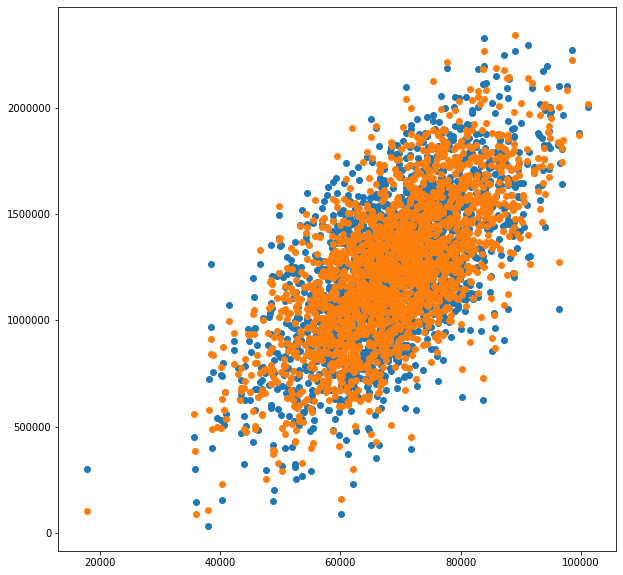

In [125]:
figure, ax = plt.subplots(figsize=(10,10))
ax.scatter(x_test1, y_test)
ax.scatter(x_test1, predict) #laranja

# Metricas de avaliacao de regressao

In [126]:
from sklearn import metrics

In [127]:
#media de erros
print("media de erros", metrics.mean_absolute_error(y_test, predict))

media de erros 82288.2225191496


In [128]:
#ao quadrado
print("media de erros ao quadrado", metrics.mean_squared_error(y_test, predict))

media de erros ao quadrado 10460958907.209688


In [129]:

print("raiz da media dos erros ao quadrado", np.sqrt(metrics.mean_absolute_error(y_test, predict)))

raiz da media dos erros ao quadrado 286.85923816246464
